<a href="https://colab.research.google.com/github/tinemyumi/saude-mental-datasus/blob/main/eda-datasets/eda_CAPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Relatório**
**Integrantes**

- Larissa Yumi Tinem
- Leo Tsuchida Hoçoya

**Conteúdo**

- Carregamento do arquivo de estabelecimentos cadastrados no CNE.
- Conversão do arquivo para Dataframe, filtrando apenas conteúdo relacionado à CAPS.
- Análise Exploratória do DataFrame.

**Histórico de alterações:**

- 28/10/2025 - Larissa Yumi Tinem - Carregamento do arquivo, conversão para df, EDA.
- 29/10/2025 - Larissa Yumi Tinem - EDA: distribuição de variáveis categóricas
- 14/11/2025 - Larissa Yumi Tinem - EDA: Tipos de CAPS por município

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importando o arquivo**

Importação do arquivo csv e conversão para dataframe, filtrando dados apenas do estado de São Paulo (CO_UF = 35) e nome fantasia = CAPS.

Data: 28/10/2025 - Autor: Larissa Tinem

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/CNES_Estabelecimentos/cnes_estabelecimentos_caps_sp.csv', sep=';', encoding='latin1')


/tmp/ipython-input-1855330211.py:3: DtypeWarning: Columns (8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/CNES_Estabelecimentos/cnes_estabelecimentos_caps_sp.csv', sep=';', encoding='latin1')


In [ ]:
# Filtrando apenas dados do estado de São Paulo (UF = 35) e  Nome Fantasia que contém "CAPS" no nome
df_caps_sp = df[
    (df['CO_UF'].astype(str).str.startswith('35')) &
    (df['NO_FANTASIA'].str.contains('CAPS', case=False, na=False))
]


In [ ]:
# Filtrando apenas as colunas necessárias para análise
colunas_analise = [
    'CO_CNES',
    'CO_UF',
    'CO_IBGE',
    'NO_RAZAO_SOCIAL',
    'NO_FANTASIA',
    'TP_GESTAO',
    'CO_ESFERA_ADMINISTRATIVA',
    'DS_ESFERA_ADMINISTRATIVA',
    'CO_ATIVIDADE',
    'TP_UNIDADE',
    'CO_CEP',
    'NO_LOGRADOURO',
    'NU_ENDERECO',
    'NO_BAIRRO',
    'NU_LATITUDE',
    'NU_LONGITUDE',
    'CO_TURNO_ATENDIMENTO'
]

df_caps_sp = df_caps_sp[colunas_analise]

In [ ]:
# Salvando o dataframe no google drive
df_caps_sp.to_csv('/content/drive/MyDrive/Dataframes/df_caps_sp.csv', index=False)

In [ ]:
import pandas as pd

df_caps_sp = pd.read_csv('/content/drive/MyDrive/Dataframes/df_caps_sp.csv')

# **Análise Exploratória Inicial do DataFrame**

Análise exploratória dos dados do dataframe df_caps_sp.

Nesta etapa, vamos inspecionar o conjunto de dados para entender sua estrutura geral, número de linhas e colunas, tipos de dados e a presença de valores ausentes.

**Objetivo desta seção**

Entender a estrutura dos dados e identificar possíveis problemas como:

- Valores ausentes
- Tipos de dados incorretos
- Distribuições não uniformes

Data: 28/10/2025 - Autor: Larissa Tinem

In [ ]:
# Mostra o nome de todas as colunas do Dataframe
df_caps_sp.columns


Index(['CO_CNES', 'CO_UF', 'CO_IBGE', 'NO_RAZAO_SOCIAL', 'NO_FANTASIA',
       'TP_GESTAO', 'CO_ESFERA_ADMINISTRATIVA', 'DS_ESFERA_ADMINISTRATIVA',
       'CO_ATIVIDADE', 'TP_UNIDADE', 'CO_CEP', 'NO_LOGRADOURO', 'NU_ENDERECO',
       'NO_BAIRRO', 'NU_LATITUDE', 'NU_LONGITUDE', 'CO_TURNO_ATENDIMENTO'],
      dtype='object')

In [ ]:
# Mostra o formato (número de linhas e colunas)
df_caps_sp.shape

(603, 17)

In [ ]:
# Traz um resumo com os tipos de dados e contagens de valores não nulos
df_caps_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CO_CNES                   603 non-null    int64  
 1   CO_UF                     603 non-null    int64  
 2   CO_IBGE                   603 non-null    int64  
 3   NO_RAZAO_SOCIAL           603 non-null    object 
 4   NO_FANTASIA               603 non-null    object 
 5   TP_GESTAO                 603 non-null    object 
 6   CO_ESFERA_ADMINISTRATIVA  603 non-null    object 
 7   DS_ESFERA_ADMINISTRATIVA  603 non-null    object 
 8   CO_ATIVIDADE              603 non-null    int64  
 9   TP_UNIDADE                603 non-null    int64  
 10  CO_CEP                    603 non-null    int64  
 11  NO_LOGRADOURO             603 non-null    object 
 12  NU_ENDERECO               603 non-null    object 
 13  NO_BAIRRO                 603 non-null    object 
 14  NU_LATITUD

In [ ]:
# Conta quantos valores nulos existem em cada coluna.
df_caps_sp.isna().sum()

,0
CO_CNES,0
CO_UF,0
CO_IBGE,0
NO_RAZAO_SOCIAL,0
NO_FANTASIA,0
TP_GESTAO,0
CO_ESFERA_ADMINISTRATIVA,0
DS_ESFERA_ADMINISTRATIVA,0
CO_ATIVIDADE,0
TP_UNIDADE,0


# **Tratando valores nulos**

Conforme análise anterior, foi verificado um total de 7678 valores nulos na coluna RACA_COR. Vamos verificar a porcentagem dos registros nulos para essa coluna. Isso ajuda a avaliar a **completude do dado**, identificando se há necessidade de tratamento (como preenchimento, exclusão ou categorização dos valores faltantes).

### **Interpretação**
O resultado indica **qual proporção** dos registros não possuem informação sobre raça/cor.  
- Se o valor for **baixo (ex: < 5%)**, provavelmente pode ser ignorado.  
- Se for **alto (ex: > 20%)**, é um alerta de que os dados dessa variável podem estar **incompletos ou enviesados**, afetando análises que dependem dessa informação.



In [ ]:
colunas = [
    'NU_LATITUDE',
    'NU_LONGITUDE',
]

# Calcula porcentagem de nulos por coluna
porcentagens_nulos = df_caps_sp[colunas].isna().mean() * 100

# ExibIção dos valores
for coluna, pct in porcentagens_nulos.items():
    print(f"{coluna}: {pct:.2f}% de valores nulos")


NU_LATITUDE: 1.99% de valores nulos
NU_LONGITUDE: 1.99% de valores nulos


In [ ]:
# Verificando valores duplicados
df_caps_sp.duplicated().sum()


np.int64(0)

## **Quantidade de CAPS no Estado de São Paulo**

Data: 14/11/2025 - Autor: Larissa Tinem

In [ ]:
total_caps = len(df_caps_sp)
print(f"Total de CAPS no Estado de São Paulo: {total_caps}")


Total de CAPS no Estado de São Paulo: 603


### **Tipos de CAPS**

- **CAPS I:** Atende pessoas de todas as idades com transtornos mentais graves ou problemas relacionados ao uso de álcool e drogas. Indicado para municípios com população acima de 15 mil habitantes.

- **CAPS II:** Atende adultos com transtornos mentais graves e persistentes, incluindo casos relacionados ao uso de substâncias. Recomendado para municípios com mais de 70 mil habitantes.

- **CAPS i:** Voltado para crianças e adolescentes com transtornos mentais graves ou relacionados ao uso de álcool e drogas. Também indicado para municípios com mais de 70 mil habitantes.

- **CAPS ad:** Focado em pessoas de todas as idades com problemas relacionados ao álcool e outras drogas, indicado para municípios com mais de 70 mil habitantes.

- **CAPS III:** Atende transtornos mentais graves e uso de substâncias, com funcionamento 24h, incluindo até 5 leitos de acolhimento noturno. Indicado para municípios com mais de 150 mil habitantes.

- **CAPS ad III:** Atende adultos, crianças e adolescentes com sofrimento intenso ligado ao uso de álcool e drogas, com funcionamento 24h e até 12 leitos. Indicado para municípios com mais de 150 mil habitantes.

**Fonte:** https://www.gov.br/saude/pt-br/composicao/saes/desmad/raps/caps

In [ ]:
# Extrair tipo com regex
df_caps_sp['TP_CAPS'] = df_caps_sp['NO_FANTASIA'].str.extract(r'(CAPS[^\s]*)')[0]

# Contagem por tipo
df_caps_sp['TP_CAPS'].value_counts()


,count
TP_CAPS,
CAPS,585
CAPSI,10
CAPSAD,4
CAPSII,2
CAPS1,2


### **Tipos de CAPS por município**

In [ ]:
# Agrupamento por município e tipo de CAPS

caps_municipio_tipo = (
    df_caps_sp
    .groupby(['CO_IBGE', 'TP_CAPS'])
    .size()
    .reset_index(name='QTD')
)

# Criação da tabela
tabela_caps = caps_municipio_tipo.pivot_table(
    index='CO_IBGE',
    columns='TP_CAPS',
    values='QTD',
    fill_value=0
)

# Tabela com total de CAPS no município
tabela_caps['TOTAL_CAPS'] = tabela_caps.sum(axis=1)

tabela_caps_ordenada = tabela_caps.sort_values(by='TOTAL_CAPS', ascending=False)
tabela_caps_ordenada.head(10)

TP_CAPS,CAPS,CAPS1,CAPSAD,CAPSI,CAPSII,TOTAL_CAPS
CO_IBGE,,,,,,
355030,125.0,0.0,0.0,1.0,0.0,126.0
350950,14.0,0.0,0.0,0.0,0.0,14.0
355220,10.0,0.0,0.0,0.0,0.0,10.0
354850,9.0,0.0,0.0,0.0,0.0,9.0
354870,9.0,0.0,0.0,0.0,0.0,9.0
354340,8.0,0.0,0.0,0.0,0.0,8.0
351880,8.0,0.0,0.0,0.0,0.0,8.0
354980,7.0,0.0,0.0,0.0,0.0,7.0
351620,5.0,0.0,0.0,0.0,0.0,5.0


# **Distribuição de Variáveis Categóricas**

### **Resultados**

A grande maioria dos CAPS são de gestão Municipal.

Data: 29/10/2025 - Autor: Larissa Tinem

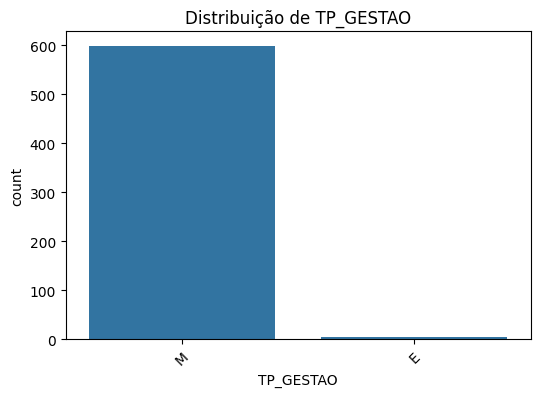

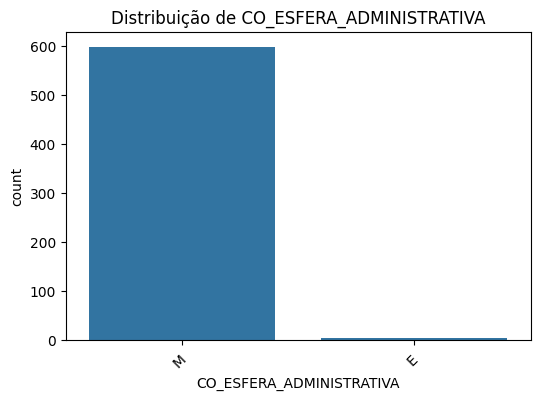

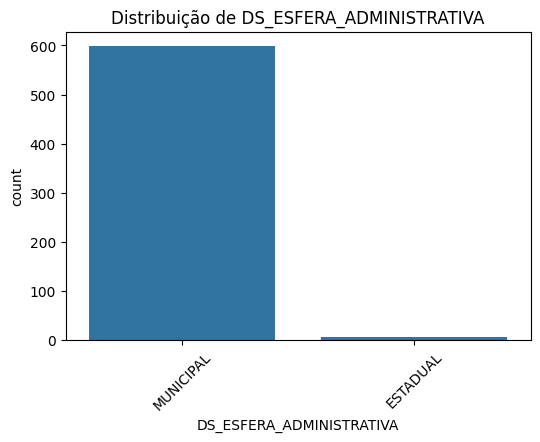

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

categoricas = ['TP_GESTAO',
               'CO_ESFERA_ADMINISTRATIVA',
               'DS_ESFERA_ADMINISTRATIVA'
]

for col in categoricas:
  plt.figure(figsize=(6,4))
  sns.countplot(x=col, data=df_caps_sp, order=df_caps_sp[col].value_counts().index)
  plt.title(f'Distribuição de {col}')
  plt.xticks(rotation=45)
  plt.show()

# **Distribuição de CAPS por município**

     CO_IBGE  QTD_CAPS
219   355030       126
40    350950        14
227   355220        10
209   354850         9
210   354870         9
192   354340         8
88    351880         8
216   354980         7
75    351620         5
23    350600         5


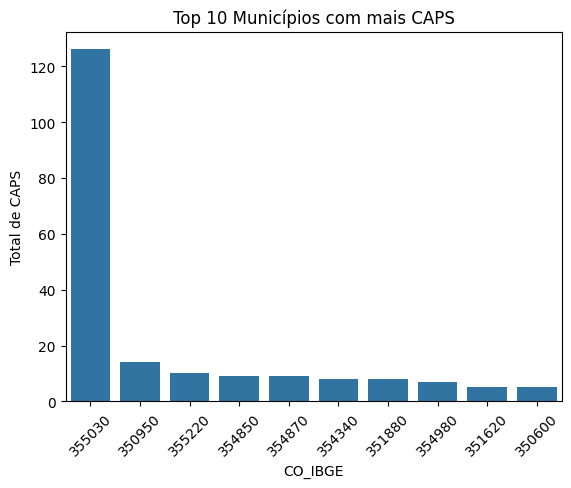

In [ ]:
caps_por_municipio = df_caps_sp.groupby('CO_IBGE').size().reset_index(name='QTD_CAPS')
caps_por_municipio = caps_por_municipio.sort_values(by='QTD_CAPS', ascending=False)
top10_caps = caps_por_municipio.head(10)
print(top10_caps)

sns.barplot(
    x = 'CO_IBGE',
    y = 'QTD_CAPS',
    data = top10_caps,
    order = top10_caps.sort_values('QTD_CAPS', ascending=False)['CO_IBGE']
)

plt.title('Top 10 Municípios com mais CAPS')
plt.ylabel('Total de CAPS')
plt.xticks(rotation=45)
plt.show()